# Executive Brief and Findings

## History of Dataset
The Facial Expression Recognition 2013 (FER2013) dataset is a widely-used resource in the field of computer vision and machine learning, particularly for tasks related to recognizing human emotions based on facial expressions. Created by Pierre-Luc Carrier and Aaron Courville, the dataset was initially used for a Kaggle competition. The primary objective of this dataset is to offer a substantial volume of labeled facial expressions to facilitate the development, training, and evaluation of machine learning models in the domain of facial expression recognition.

# Size and Scale
The FER2013 dataset comprises two directories: one for training and another for testing. Each directory contains grayscale images of faces, each with a resolution of 48x48 pixels. These images are classified into seven distinct emotion categories: Angry, Disgust, Fear, Happy, Sad, Surprise, and Neutral. The division into training and testing directories facilitates the streamlined development and evaluation of machine learning models.

# Labels and Data Format
Each image file in the dataset is stored in a folder that corresponds to one of the seven emotion labels, making this a supervised learning problem. The folder names serve as the labels for the images, and they are integers ranging from 0 to 6, each mapping to a specific emotion. This format makes it easy to load the data into machine learning frameworks for further processing and analysis.

# Class Distribution
It's important to note that the dataset may exhibit some class imbalance. For instance, the 'Happy' category might contain significantly more samples compared to other emotions like 'Disgust' or 'Fear'. This imbalance is a crucial aspect to consider during the model training phase to mitigate bias.


# Objective


---


Make a review of the main characteristics of the dataset:
- Enviroment
    - Hardware
    - Modules
- General Description
    - Size and characteristics
    - Classes and distribution
    - Data format
- Image characteristics
    - Data Samples
    - Image review

---



# Enviroment
---

## Hardware



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


## Modules


---



In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import subprocess
import tensorflow.keras as K
import PIL

# General Description


---

## Size and Characteristics

In [5]:
img_train = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/train/'
img_test = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/test/'


In [7]:
# Generating a pandas object

cl_train = sorted(os.listdir(img_train))
cl_test = sorted(os.listdir(img_test))

for_pd = []

for cl in cl_train:
    for c in sorted(os.listdir(img_train + cl)):
        route = img_train + cl + '/' + c
        size = os.path.getsize(route)
        img = K.utils.load_img(route, grayscale=True, color_mode='gayscale')
        for_pd.append(('train', cl, route, size, img.mode, img.format, img.size))

for cl in cl_test:
    for c in sorted(os.listdir(img_test + cl)):
        route = img_test + cl + '/' + c
        size = os.path.getsize(route)
        img = K.utils.load_img(route, grayscale=True, color_mode='gayscale')
        for_pd.append(('test', cl, route, size, img.mode, img.format, img.size))

columns = ['dataset', 'sentiment', 'route', 'size', 'mode', 'format', 'shape']

dat = {k: [] for k in columns}

for v in for_pd:
    dat['dataset'].append(v[0])
    dat['sentiment'].append(v[1])
    dat['route'].append(v[2])
    dat['size'].append(v[3])
    dat['mode'].append(v[4])
    dat['format'].append(v[5])
    dat['shape'].append(v[6])


/usr/local/lib/python3.10/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [8]:
dataset = pd.DataFrame(dat)
dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/dataset.cvs')

In [9]:
print(dataset.info())
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35937 entries, 0 to 35936
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dataset    35937 non-null  object
 1   sentiment  35937 non-null  object
 2   route      35937 non-null  object
 3   size       35937 non-null  int64 
 4   mode       35937 non-null  object
 5   format     35937 non-null  object
 6   shape      35937 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.9+ MB
None
               size
count  35937.000000
mean    1574.704761
std      161.923587
min      359.000000
25%     1473.000000
50%     1578.000000
75%     1679.000000
max     2483.000000


In [12]:
dataset.head()

,dataset,sentiment,route,size,mode,format,shape
0,train,angry,/content/drive/MyDrive/Colab Notebooks/ProyFin...,1444,L,JPEG,"(48, 48)"
1,train,angry,/content/drive/MyDrive/Colab Notebooks/ProyFin...,1726,L,JPEG,"(48, 48)"
2,train,angry,/content/drive/MyDrive/Colab Notebooks/ProyFin...,359,L,JPEG,"(48, 48)"
3,train,angry,/content/drive/MyDrive/Colab Notebooks/ProyFin...,1546,L,JPEG,"(48, 48)"
4,train,angry,/content/drive/MyDrive/Colab Notebooks/ProyFin...,1564,L,JPEG,"(48, 48)"


### Size and Number

In [22]:
dataset[['dataset', 'sentiment', 'size']]

,dataset,sentiment,size
0,train,angry,1444
1,train,angry,1726
2,train,angry,359
3,train,angry,1546
4,train,angry,1564
...,...,...,...
35932,test,surprise,1531
35933,test,surprise,1649
35934,test,surprise,1458
35935,test,surprise,1277


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_4, *['size'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['size'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_6, *['dataset'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_7, *['sentiment'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_8, *['dataset', 'sentiment'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['size', 'dataset'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['size', 'sentiment'], **{'inner': 'box'})
chart

### Shapes and Formats

In [24]:
dataset[['dataset', 'mode', 'format', 'shape']].value_counts()

dataset  mode  format  shape   
train    L     JPEG    (48, 48)    28729
test     L     JPEG    (48, 48)     7208
dtype: int64

# Data Samples and Image Review



---



## Train Set


---



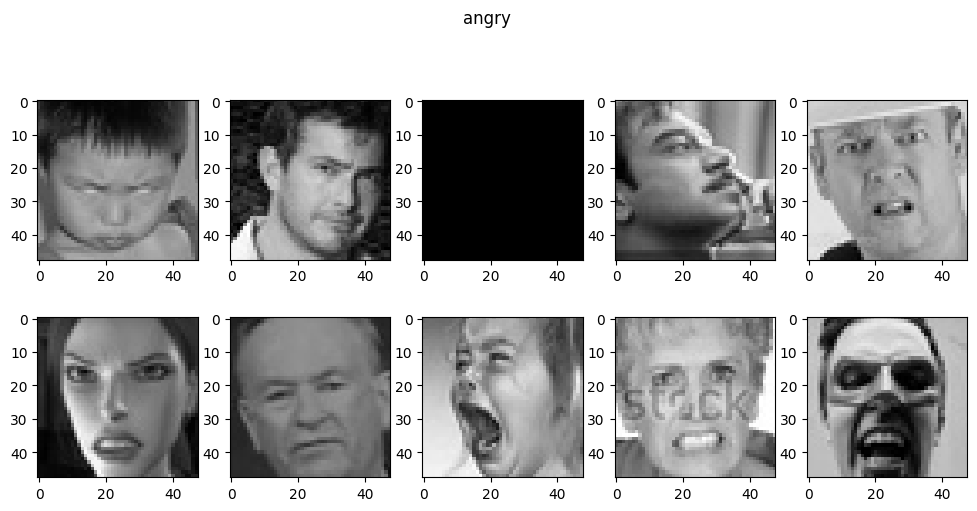

--------------------------------


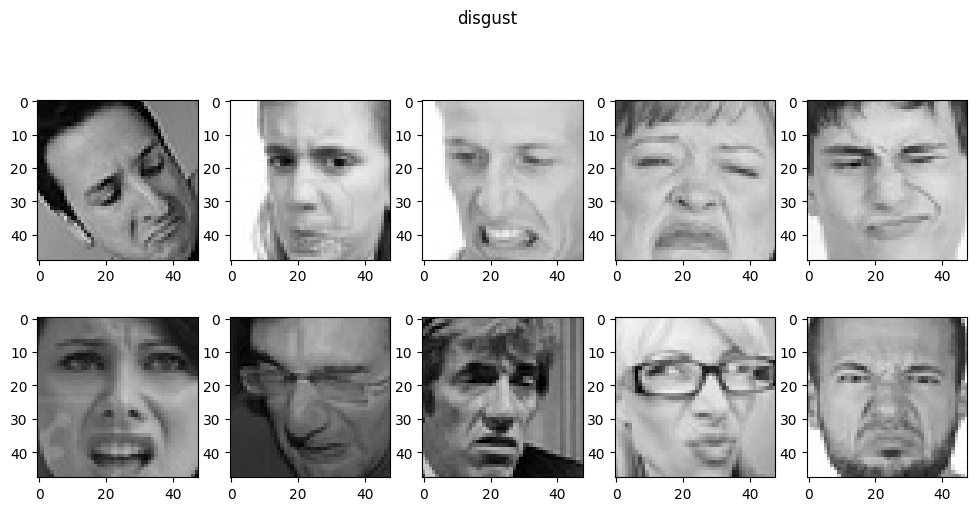

--------------------------------


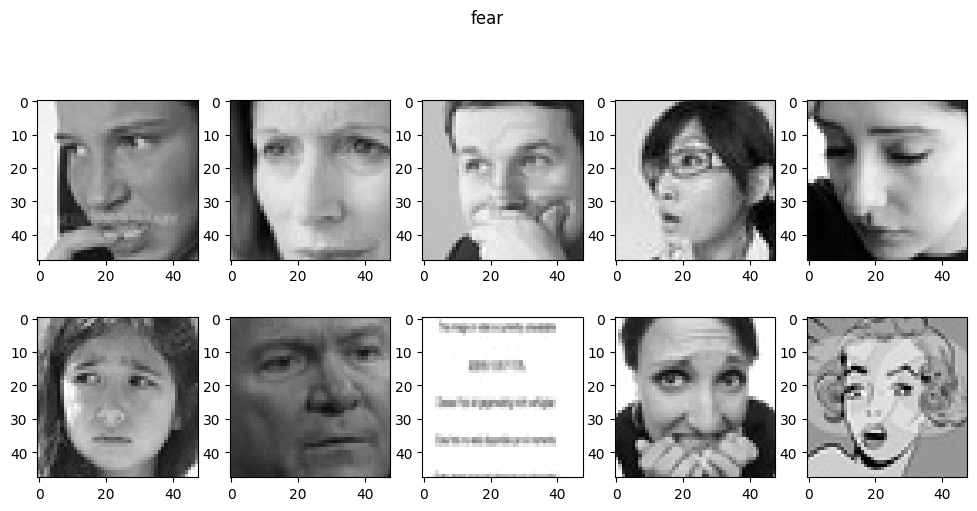

--------------------------------


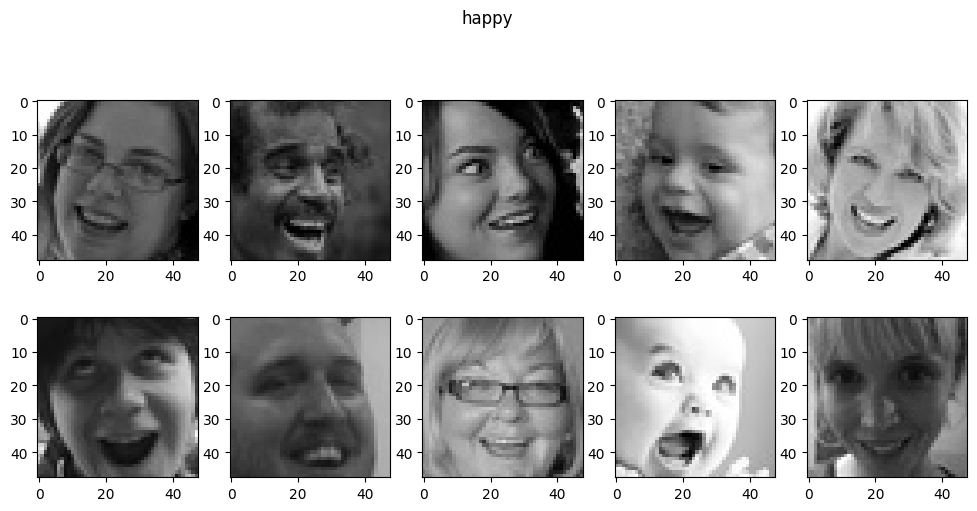

--------------------------------


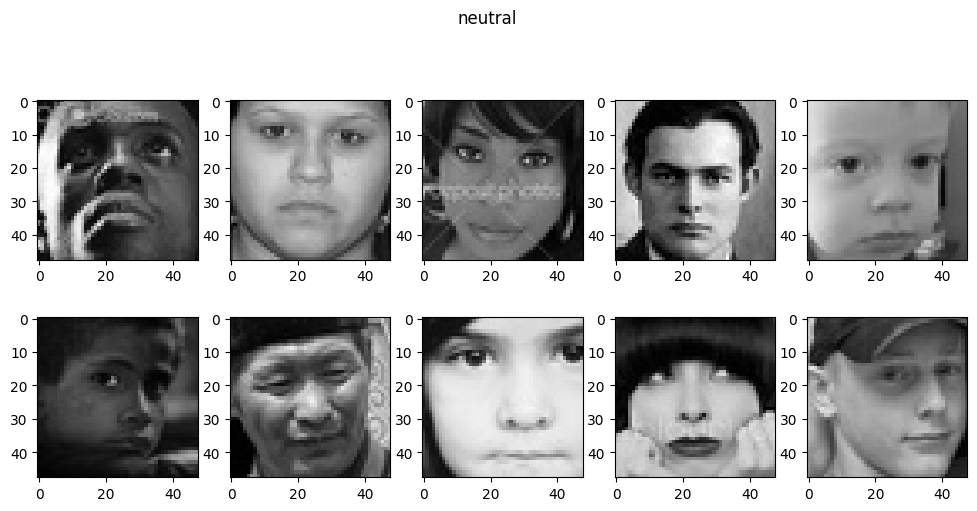

--------------------------------


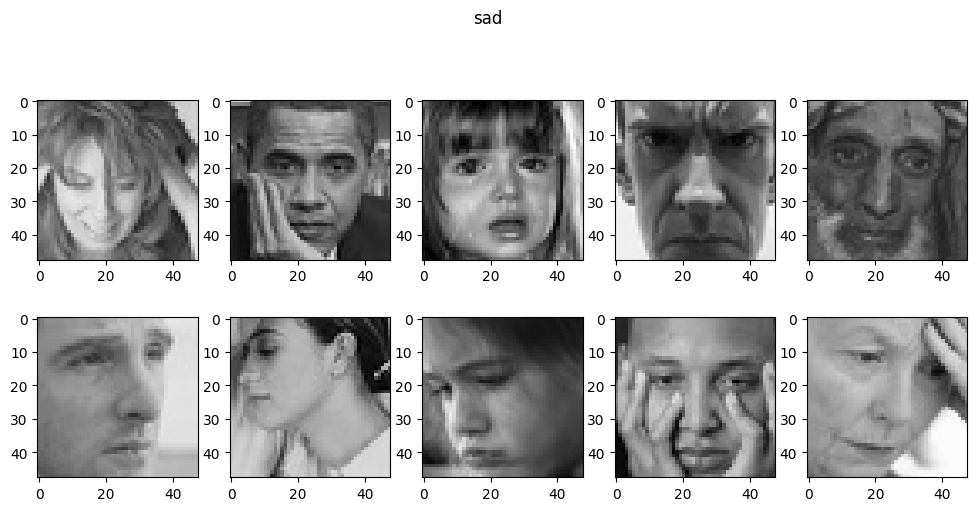

--------------------------------


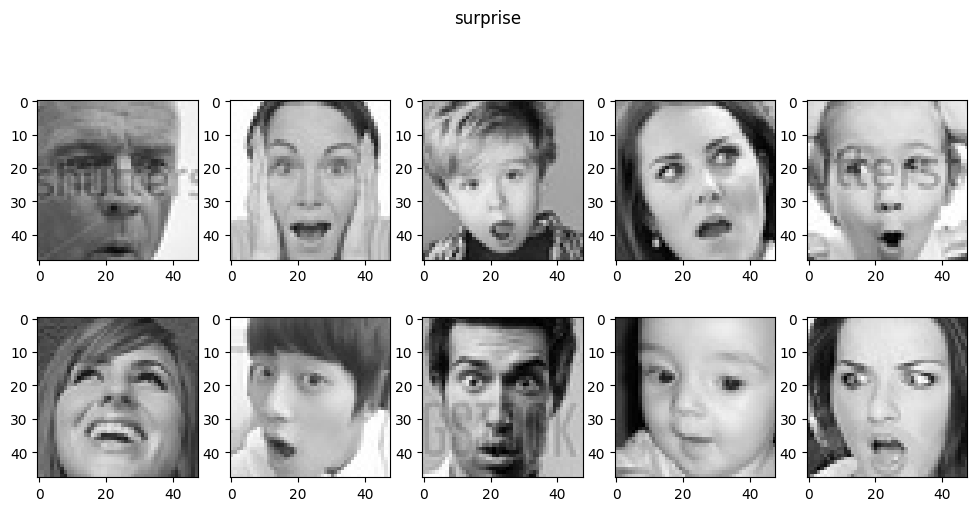

--------------------------------


In [ ]:
img_train = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/train/'
clasifications = sorted(os.listdir(img_train))

for clasification in clasifications:
    fig = plt.figure(figsize=(12, 8))
    fig.suptitle(clasification)
    for i, c in enumerate(sorted(os.listdir(img_train + clasification))):
        image = K.utils.load_img(img_train + clasification + '/' +  c)
        ax = fig.add_subplot(3, 5, i + 1)
        ax.xaxis.get_tick_params('minor')
        ax.yaxis.get_tick_params('minor')
        plt.imshow(image)
        if i == 9:
            plt.show()
            print('--------------------------------')
            break



## Test Set


---



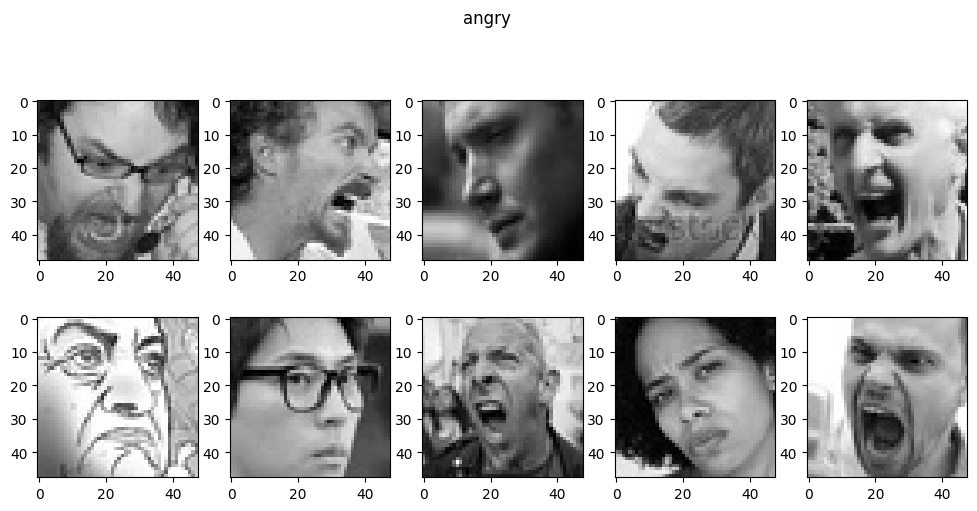

--------------------------------


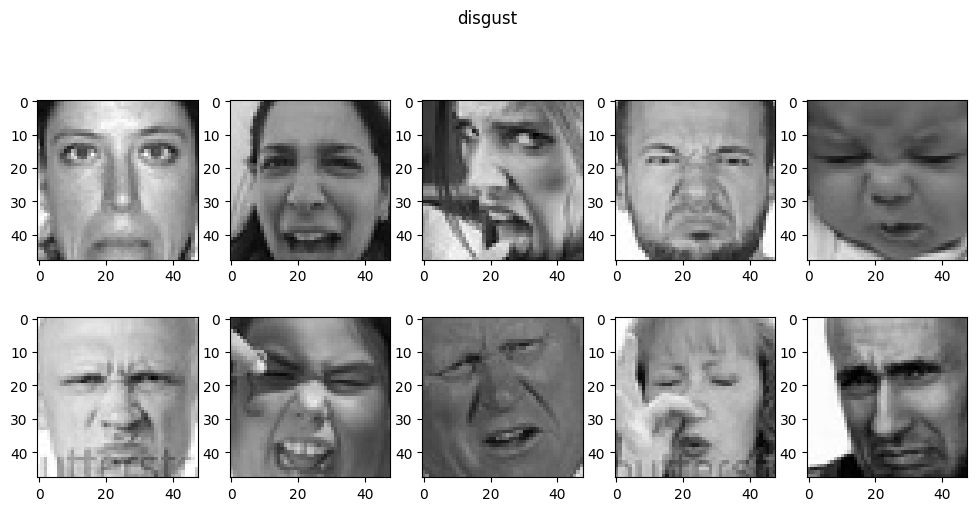

--------------------------------


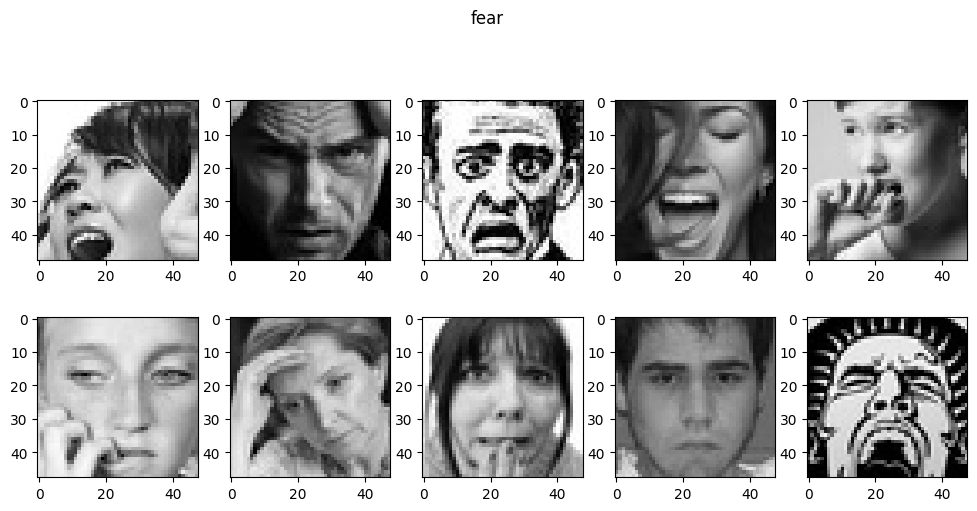

--------------------------------


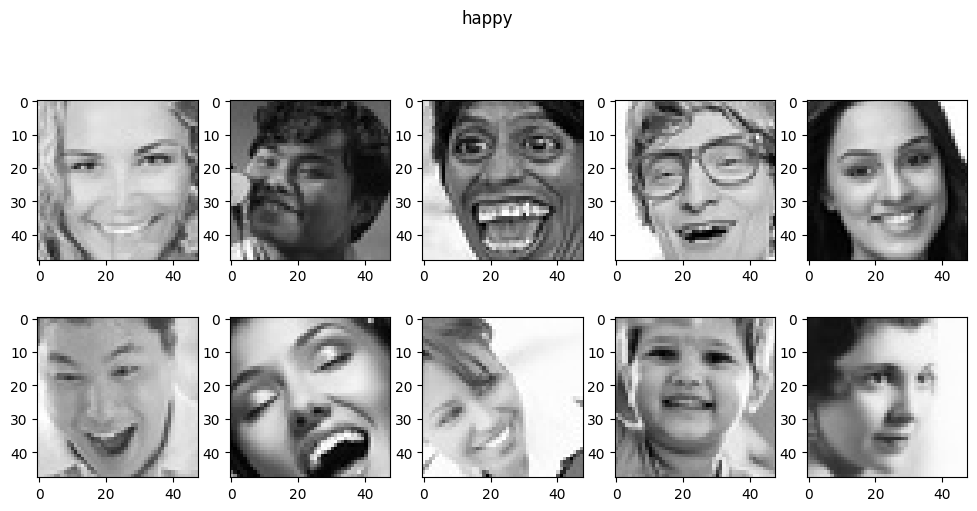

--------------------------------


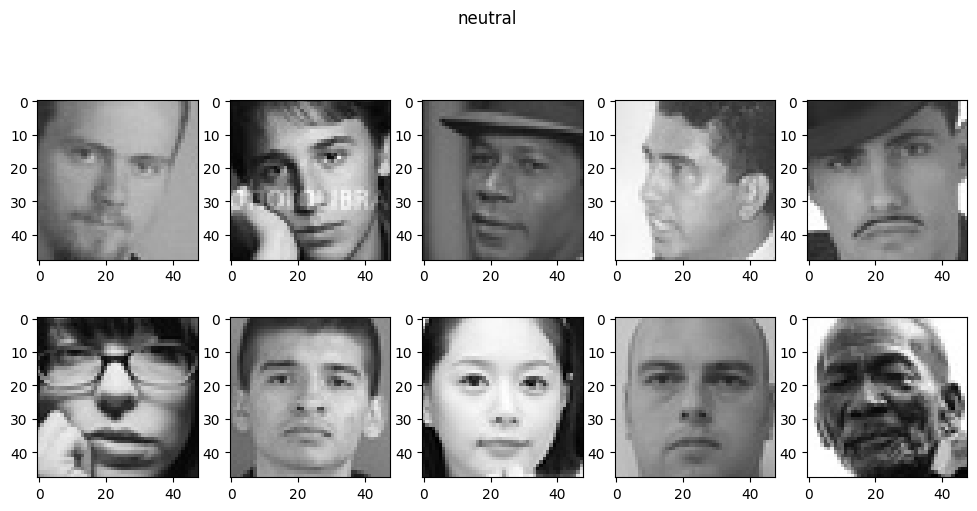

--------------------------------


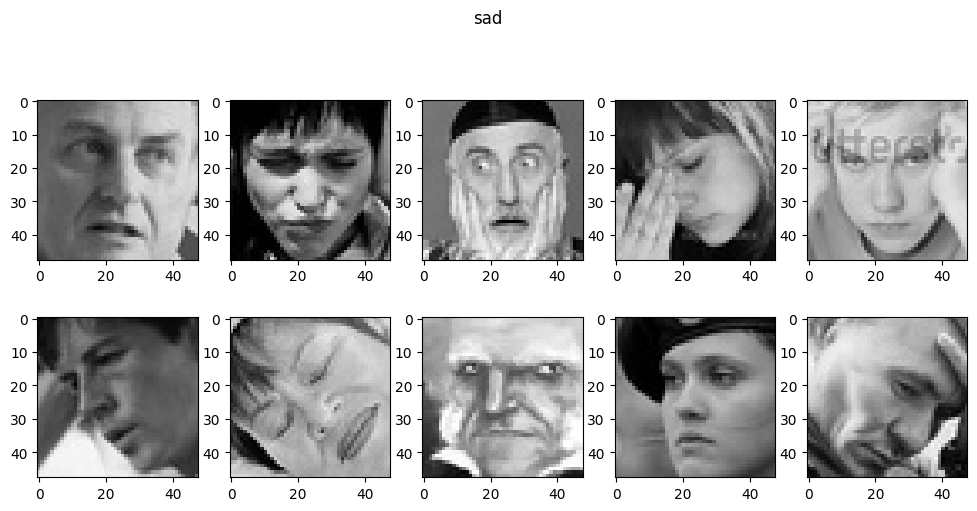

--------------------------------


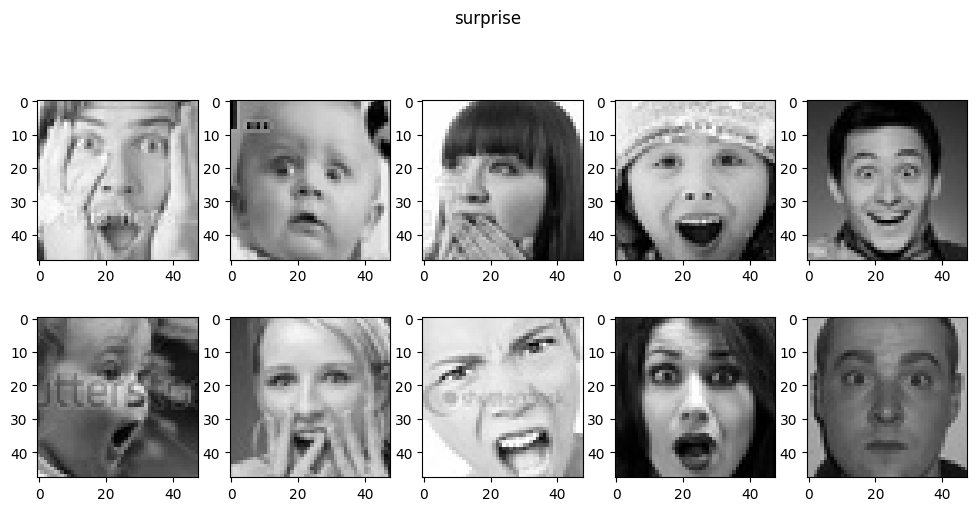

--------------------------------


In [ ]:
img_test = '/content/drive/MyDrive/Colab Notebooks/ProyFinal/Achive/test/'
clasifications = sorted(os.listdir(img_test))

for clasification in clasifications:
    fig = plt.figure(figsize=(12, 8))
    fig.suptitle(clasification)
    for i, c in enumerate(sorted(os.listdir(img_test + clasification))):
        image = K.utils.load_img(img_test + clasification + '/' +  c)
        ax = fig.add_subplot(3, 5, i + 1)
        ax.xaxis.get_tick_params('minor')
        ax.yaxis.get_tick_params('minor')
        plt.imshow(image)
        if i == 9:
            plt.show()
            print('--------------------------------')
            break

